In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# read Iris data set

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
#df = pd.read_csv('iris.csv', header = None)
df.tail()

IA = df.iloc[:,:].values
for i_ in range(0,len(df),10):
    print(i_, IA[i_,:])

Cl = IA[:,4]

0 [5.1 3.5 1.4 0.2 'Iris-setosa']
10 [5.4 3.7 1.5 0.2 'Iris-setosa']
20 [5.4 3.4 1.7 0.2 'Iris-setosa']
30 [4.8 3.1 1.6 0.2 'Iris-setosa']
40 [5.0 3.5 1.3 0.3 'Iris-setosa']
50 [7.0 3.2 4.7 1.4 'Iris-versicolor']
60 [5.0 2.0 3.5 1.0 'Iris-versicolor']
70 [5.9 3.2 4.8 1.8 'Iris-versicolor']
80 [5.5 2.4 3.8 1.1 'Iris-versicolor']
90 [5.5 2.6 4.4 1.2 'Iris-versicolor']
100 [6.3 3.3 6.0 2.5 'Iris-virginica']
110 [6.5 3.2 5.1 2.0 'Iris-virginica']
120 [6.9 3.2 5.7 2.3 'Iris-virginica']
130 [7.4 2.8 6.1 1.9 'Iris-virginica']
140 [6.7 3.1 5.6 2.4 'Iris-virginica']


In [3]:
# get Iris classifications

IC = np.unique(IA[:,4])
print (IC)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [4]:
pltC = ('red', 'blue', 'green')
pltM = ('o', 'x', '*')
for i in range(0,3):
    print(IC[i], pltC[i], pltM[i])

Iris-setosa red o
Iris-versicolor blue x
Iris-virginica green *


In [5]:
# setup Iris feature lablels

IrisF=("sepal length in cm", "sepal width in cm", "petal length in cm", "petal width in cm")
for i in range(0,4):
    print(IrisF[i])

sepal length in cm
sepal width in cm
petal length in cm
petal width in cm


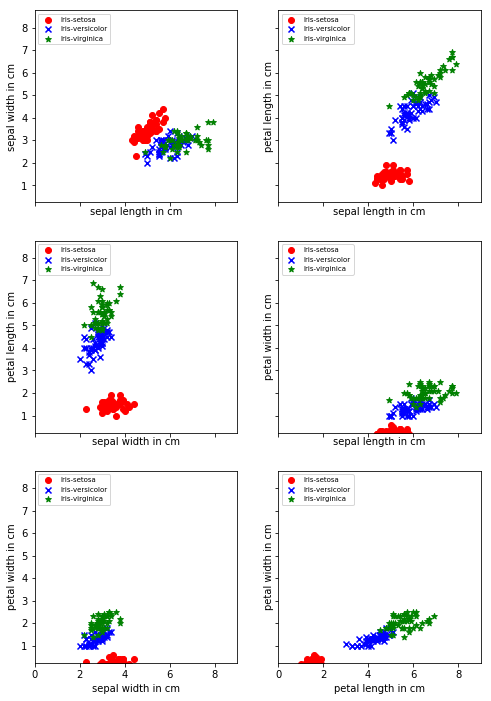

In [6]:
# plot classifications of all pairs of features 

plt.close('all')
fig, ax = plt.subplots(nrows=3, ncols=2, figsize= (8,12), sharex=True, sharey=True)


i = 0
k = 0
k1 = 0
k2 = 0
while i < 4:
    yF = IrisF[i]
    j = 0
    while j < i:
        k1 = np.int(k/2)
        k2 = np.mod(k,2)
        xF = IrisF[j]
        
        ax[k1,k2].scatter(x=IA[Cl == IC[0], j], y=IA[Cl == IC[0], i], color=pltC[0], 
                          marker=pltM[0], label=IC[0])
        ax[k1,k2].scatter(x=IA[Cl == IC[1], j], y=IA[Cl == IC[1], i], color=pltC[1], 
                          marker=pltM[1], label=IC[1])
        ax[k1,k2].scatter(x=IA[Cl == IC[2], j], y=IA[Cl == IC[2], i], color=pltC[2], 
                          marker=pltM[2], label=IC[2])
        ax[k1,k2].set(aspect='equal')
        ax[k1,k2].set_xlim([0,9])
        ax[k1,k2].set_ylim([0,9])
        ax[k1,k2].set_xlabel(xF)
        ax[k1,k2].set_ylabel(yF)
        ax[k1,k2].legend(loc='upper left', fontsize='x-small')
        j += 1
        k += 1
    i += 1
plt.show()    

# -------------------------------Assignment for Week 5----------------------------------
## -------------------------------------------Pooneet Thaper-------------------------------------------

In [7]:
# Pooneet Thaper
# Professor Grimmelmann
# CSC 59929

# Assignment for Week 5:

# Classification on set of all classes
    # Classes: setosa (0), versicolor (1), and virginica (2)

cdx = np.array([0, 1, 2])

# Notes on data:
    # Since we are dealing with three classes, the class labels will be encoded using One-Hot encoding
        # Encoding it in a One Hot format allows us to get class labels for One-vs-Rest for each class easily
    # A train test split was tried but was not used in the final submission 
        # This was to prevent the introduction of a new variable since we are looking at samples

# Features:
    # 0: sepal length in cm
    # 1: sepal width in cm
    # 2: petal length in cm
    # 3: petal width in cm

# Cases (in order shown below):
    # Two Feature Cases:
        # sepal length (0) and sepal width (1)
        # sepal length (0) and petal length (2)
        # sepal length (0) and petal width (3)
        # sepal width (1) and petal length (2)
        # sepal width (1) and petal width (2)
        # petal length (2) and petal width (3)
    # Three Feature Cases:
        # sepal length (0), sepal width (1), and petal length (2)
        # sepal length (0), sepal width (1), and petal width (3)
        # sepal length (0), petal length (2), and petal width (3)
        # sepal width (1), petal length (2), and petal width (3)
    # Four Feature Case:
        # sepal length (0), sepal width (1), petal length (2), and petal width (3)

# Format for each case:
#   0. Created class for handling One-Vs-Rest multiclass classification using multiple binary classifiers
#   1. Get features and classes (One Hot for classification and Class for plotting) for all samples in chosen classes
#   2. Visualize features and normalized features
#   3. Train One-vs-Rest LogisticRegression classifier with raw features and show accuracy and number of iterations to
#         converge for C = [0.001, 0.01, 0.1, 1, 10, 100, 1000] and with penalty equal to L1 and L2
#   4. Train One-vs-Rest LogisticRegression with default parameters and recorded accuracy and number of iterations
#   5. Visualize decision boundary on pair of features for each class (since each had a binary classifier available) 
#         (only done for cases with two features)

# List to keep records on performance of each system
Records = []
case_num = 0

In [8]:
# Helper functions declared before cases and generalized for arbitrary number of features

def get_class_labels_and_features():
    i = 0
    numCl = 0
    for i in range(0 , len(Cl)):
        if Cl[i] == IC[cdx[0]]:
            numCl += 1
        if Cl[i] == IC[cdx[1]]:
            numCl += 1    
        if Cl[i] == IC[cdx[2]]:
            numCl += 1 
        i += 1  
        
    NC = np.zeros((numCl, len(cdx)))
    NF = np.zeros((numCl, len(fdx)))

    i = 0
    j = 0
    for i in range(0 , len(Cl)):
        if Cl[i] == IC[cdx[0]]:        
            NC[j] = [1,0,0]
            for k in range(len(fdx)):
                NF[j,k] = IA[i,fdx[k]]
            j += 1
        if Cl[i] == IC[cdx[1]]:      
            NC[j] = [0,1,0]
            for k in range(len(fdx)):
                NF[j,k] = IA[i,fdx[k]]
            j += 1
        if Cl[i] == IC[cdx[2]]:      
            NC[j] = [0,0,1]
            for k in range(len(fdx)):
                NF[j,k] = IA[i,fdx[k]]
            j += 1
        i += 1
        
    NC_Class = np.nonzero(NC)[1]
    return (NC, NF, NC_Class)

from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.01, is_sub_plot=False, plot=plt, selected=[0,1], positive_color='red'):
    X = np.vstack((X[:,selected[0]], X[:,selected[1]])).T
    # setup marker generator and color map
    colors = ('grey', positive_color)
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plot.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    if (is_sub_plot):
        plot.set_xlim(xx1.min(), xx1.max())
        plot.set_ylim(xx2.min(), xx2.max())
    else:
        plot.xlim(xx1.min(), xx1.max())
        plot.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plot.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=pltC[cdx[idx]],
                    marker=pltM[cdx[idx]], label=IC[cdx[idx]])
    if (is_sub_plot):
        plot.set_title('Logistic Regression', fontsize='medium')
        plot.set_xlabel('{} [standardized]'.format(IrisF[fdx[0]]))
        plot.set_ylabel('{} [standardized]'.format(IrisF[fdx[1]]))
    else:
        plot.title('Logistic Regression', fontsize='medium')
        plot.xlabel('{} [standardized]'.format(IrisF[fdx[0]]))
        plot.ylabel('{} [standardized]'.format(IrisF[fdx[1]]))
    plot.legend(loc='upper left', fontsize='small')
        

def standardize_features(NF):
    NF_Std = np.copy(NF)
    for i in range(len(fdx)):
        NF_Std[:,i] = (NF[:,i] - NF[:,i].mean()) / NF[:,i].std()
    return NF_Std

def plot_features(sub_plot, NF, NC, title, selected=[0,1]):
    NF = np.vstack((NF[:,selected[0]], NF[:,selected[1]])).T
    sub_plot.scatter(x = NF[NC == 0, 0], y = NF[NC == 0, 1], color=pltC[cdx[0]], 
                marker=pltM[cdx[0]], label=IC[cdx[0]])
    sub_plot.scatter(x = NF[NC == 1, 0], y = NF[NC == 1, 1], color=pltC[cdx[1]], 
                marker=pltM[cdx[1]], label=IC[cdx[1]])
    sub_plot.scatter(x = NF[NC == 2, 0], y = NF[NC == 2, 1], color=pltC[cdx[2]], 
                marker=pltM[cdx[2]], label=IC[cdx[2]])
    sub_plot.set_xlabel(IrisF[fdx[selected[0]]])
    sub_plot.set_ylabel(IrisF[fdx[selected[1]]])
    sub_plot.legend(loc='lower right')
    sub_plot.set_title(title)

def plot_raw_standardized():
    f = []
    i = 0;
    j = 1;
    while j<len(fdx):
        f.append([i,j])
        j+=1
        if (j==len(fdx)):
            i+=1
            j = i+1

    fig, ax = plt.subplots(nrows=len(f), ncols=2, figsize = (12,4*len(f)))
    fig.subplots_adjust(hspace=.4)

    for i in range(len(f)):
        plot_features(ax[i, 0], NF, NC_Class, 'Raw feature values', f[i])
        plot_features(ax[i, 1], NF_Std, NC_Class, 'Normalized feature values', f[i])



In [9]:
class one_vs_rest_logistic_regression:
    def __init__(self, penalty='l1', C=1.0):
        self.penalty = penalty
        self.C = C
        self.clfs = []
        self.n_iter_ = [0]
        
    def fit(self, X, Y):
        # Precondition: Y expected to have One-Hot encoded class for each sample
        for i in range(len(Y[0])):
            # Fit each One-vs-rest classifier for each class
            clf = LogisticRegression(penalty=self.penalty, C=self.C).fit(X, Y[:,i])
            self.n_iter_[0] += clf.n_iter_[0]
            self.clfs.append(clf)
        return self
    
    def predict(self, X):
        scores = []
        for i in range(len(cdx)):
            # Grab the confidence that the element is of the given class and append to score
            scores.append(self.clfs[i].predict_proba(X)[:,1])
        
        # Get the highest confidence class for each sample
        classes = np.asarray(scores).T.argmax(axis=1)
        return classes
        
    def score(self, X, Y):
        # Precondition: Y expected to have One-Hot encoded class for each sample
        accuracy = np.mean(self.predict(X) == Y.argmax(axis=1))
        return accuracy

## -------------------------------------------Two Feature Cases-------------------------------------------

In [10]:
# Two Feature Cases:
# sepal length (0) and sepal width (1)
fdx = np.array([0,1])
# Get Class Labels and Selected Features for each sample
NC, NF, NC_Class = get_class_labels_and_features()

# Splitting data into train-test sets (70/30 split) 
# NF_train, NF_test, NC_train, NC_test = train_test_split(NF_Std, NC, test_size=0.3)

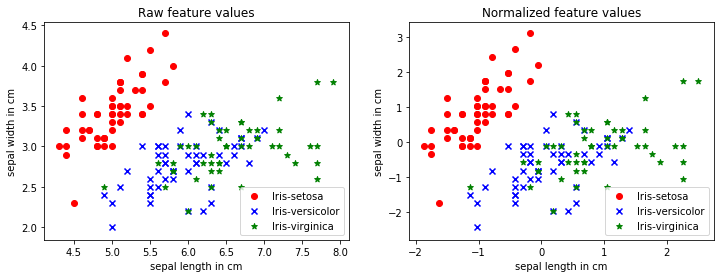

In [11]:
# Standardize Inputs
NF_Std = standardize_features(NF)

plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12,4))
plot_features(ax[0], NF, NC_Class, 'Raw feature values')
plot_features(ax[1], NF_Std, NC_Class, 'Normalized feature values')
plt.show()

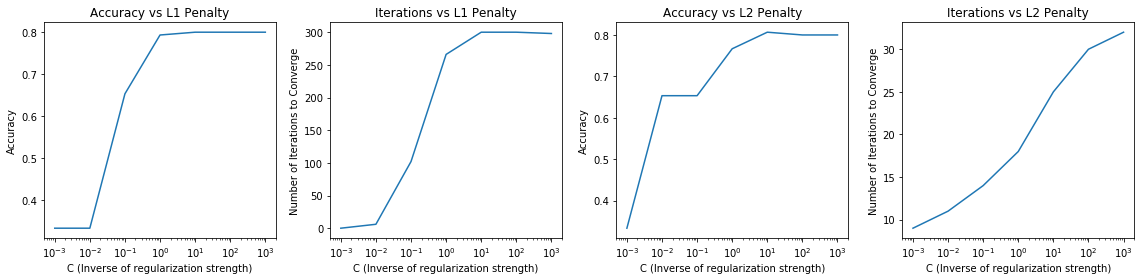

In [12]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (16,4))

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
accuracy_L1 = []
accuracy_L2 = []
num_iter_L1 = []
num_iter_L2 = []

for curr_C in C_values:
    clf_L1 = one_vs_rest_logistic_regression(penalty='l1', C=curr_C).fit(NF, NC)
    accuracy_L1.append(clf_L1.score(NF, NC))
    num_iter_L1.append(clf_L1.n_iter_[0])
    clf_L2 = one_vs_rest_logistic_regression(penalty='l2', C=curr_C).fit(NF, NC)
    accuracy_L2.append(clf_L2.score(NF, NC))
    num_iter_L2.append(clf_L2.n_iter_[0])

ax[0].semilogx(C_values, accuracy_L1)
ax[0].set_xlabel("C (Inverse of regularization strength)")
ax[0].set_ylabel("Accuracy")
ax[0].set_title("Accuracy vs L1 Penalty")

ax[1].semilogx(C_values, num_iter_L1)
ax[1].set_xlabel("C (Inverse of regularization strength)")
ax[1].set_ylabel("Number of Iterations to Converge")
ax[1].set_title("Iterations vs L1 Penalty")

ax[2].semilogx(C_values, accuracy_L2)
ax[2].set_xlabel("C (Inverse of regularization strength)")
ax[2].set_ylabel("Accuracy")
ax[2].set_title("Accuracy vs L2 Penalty")

ax[3].semilogx(C_values, num_iter_L2)
ax[3].set_xlabel("C (Inverse of regularization strength)")
ax[3].set_ylabel("Number of Iterations to Converge")
ax[3].set_title("Iterations vs L2 Penalty")

fig.tight_layout()
plt.show()

In [13]:
# Train on default settings and record
clf = one_vs_rest_logistic_regression().fit(NF, NC)
acc = clf.score(NF, NC)
n_iter = clf.n_iter_[0]
Records.append([case_num, len(fdx), np.copy(fdx), acc, n_iter])
case_num+=1
print(acc)

0.793333333333


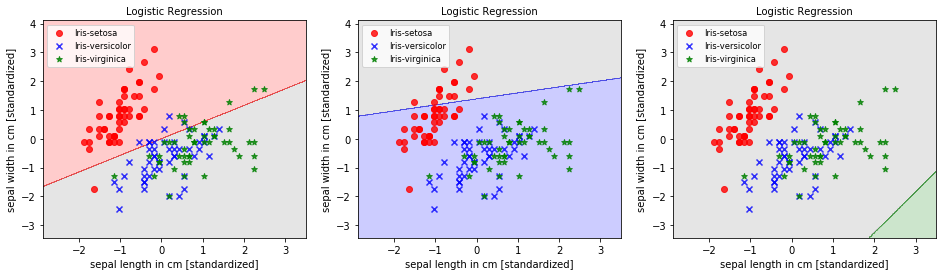

In [14]:
# Plot decision regions for each class
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (16,4))
for i in range(len(ax)):
    plot_decision_regions(NF_Std, NC_Class, classifier = clf.clfs[i], is_sub_plot=True, plot=ax[i], positive_color=pltC[i])
plt.show()

In [15]:
# Two Feature Cases:
# sepal length (0) and petal length (2)
fdx = np.array([0,2])
# Get Class Labels and Selected Features for each sample
NC, NF, NC_Class = get_class_labels_and_features()

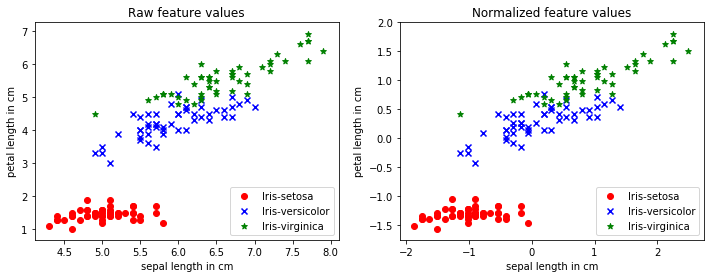

In [16]:
# Standardize Inputs
NF_Std = standardize_features(NF)

plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12,4))
plot_features(ax[0], NF, NC_Class, 'Raw feature values')
plot_features(ax[1], NF_Std, NC_Class, 'Normalized feature values')
plt.show()

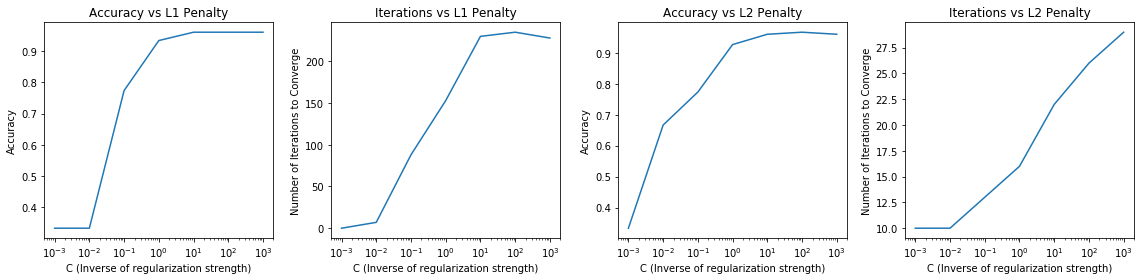

In [17]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (16,4))

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
accuracy_L1 = []
accuracy_L2 = []
num_iter_L1 = []
num_iter_L2 = []

for curr_C in C_values:
    clf_L1 = one_vs_rest_logistic_regression(penalty='l1', C=curr_C).fit(NF, NC)
    accuracy_L1.append(clf_L1.score(NF, NC))
    num_iter_L1.append(clf_L1.n_iter_[0])
    clf_L2 = one_vs_rest_logistic_regression(penalty='l2', C=curr_C).fit(NF, NC)
    accuracy_L2.append(clf_L2.score(NF, NC))
    num_iter_L2.append(clf_L2.n_iter_[0])

ax[0].semilogx(C_values, accuracy_L1)
ax[0].set_xlabel("C (Inverse of regularization strength)")
ax[0].set_ylabel("Accuracy")
ax[0].set_title("Accuracy vs L1 Penalty")

ax[1].semilogx(C_values, num_iter_L1)
ax[1].set_xlabel("C (Inverse of regularization strength)")
ax[1].set_ylabel("Number of Iterations to Converge")
ax[1].set_title("Iterations vs L1 Penalty")

ax[2].semilogx(C_values, accuracy_L2)
ax[2].set_xlabel("C (Inverse of regularization strength)")
ax[2].set_ylabel("Accuracy")
ax[2].set_title("Accuracy vs L2 Penalty")

ax[3].semilogx(C_values, num_iter_L2)
ax[3].set_xlabel("C (Inverse of regularization strength)")
ax[3].set_ylabel("Number of Iterations to Converge")
ax[3].set_title("Iterations vs L2 Penalty")

fig.tight_layout()
plt.show()

In [18]:
# Train on default settings and record
clf = one_vs_rest_logistic_regression().fit(NF, NC)
acc = clf.score(NF, NC)
n_iter = clf.n_iter_[0]
Records.append([case_num, len(fdx), np.copy(fdx), acc, n_iter])
case_num+=1
print(acc)

0.933333333333


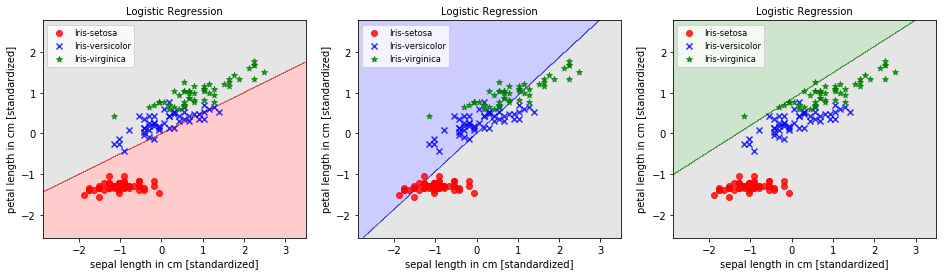

In [19]:
# Plot decision regions for each class
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (16,4))
for i in range(len(ax)):
    plot_decision_regions(NF_Std, NC_Class, classifier = clf.clfs[i], is_sub_plot=True, plot=ax[i], positive_color=pltC[i])
plt.show()

In [20]:
# Two Feature Cases:
# sepal length (0) and petal width (3)
fdx = np.array([0,3])
# Get Class Labels and Selected Features for each sample
NC, NF, NC_Class = get_class_labels_and_features()

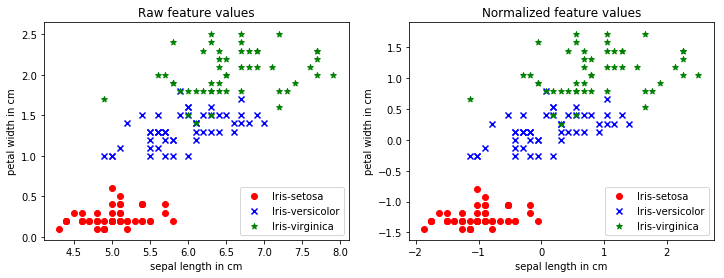

In [21]:
# Standardize Inputs
NF_Std = standardize_features(NF)

plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12,4))
plot_features(ax[0], NF, NC_Class, 'Raw feature values')
plot_features(ax[1], NF_Std, NC_Class, 'Normalized feature values')
plt.show()

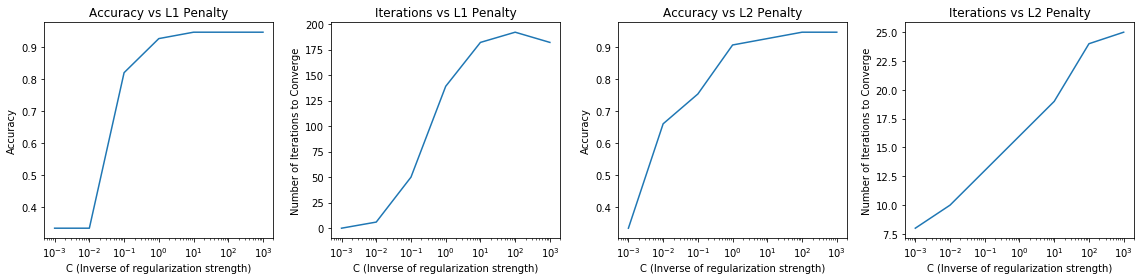

In [22]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (16,4))

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
accuracy_L1 = []
accuracy_L2 = []
num_iter_L1 = []
num_iter_L2 = []

for curr_C in C_values:
    clf_L1 = one_vs_rest_logistic_regression(penalty='l1', C=curr_C).fit(NF, NC)
    accuracy_L1.append(clf_L1.score(NF, NC))
    num_iter_L1.append(clf_L1.n_iter_[0])
    clf_L2 = one_vs_rest_logistic_regression(penalty='l2', C=curr_C).fit(NF, NC)
    accuracy_L2.append(clf_L2.score(NF, NC))
    num_iter_L2.append(clf_L2.n_iter_[0])

ax[0].semilogx(C_values, accuracy_L1)
ax[0].set_xlabel("C (Inverse of regularization strength)")
ax[0].set_ylabel("Accuracy")
ax[0].set_title("Accuracy vs L1 Penalty")

ax[1].semilogx(C_values, num_iter_L1)
ax[1].set_xlabel("C (Inverse of regularization strength)")
ax[1].set_ylabel("Number of Iterations to Converge")
ax[1].set_title("Iterations vs L1 Penalty")

ax[2].semilogx(C_values, accuracy_L2)
ax[2].set_xlabel("C (Inverse of regularization strength)")
ax[2].set_ylabel("Accuracy")
ax[2].set_title("Accuracy vs L2 Penalty")

ax[3].semilogx(C_values, num_iter_L2)
ax[3].set_xlabel("C (Inverse of regularization strength)")
ax[3].set_ylabel("Number of Iterations to Converge")
ax[3].set_title("Iterations vs L2 Penalty")

fig.tight_layout()
plt.show()

In [23]:
# Train on default settings and record
clf = one_vs_rest_logistic_regression().fit(NF, NC)
acc = clf.score(NF, NC)
n_iter = clf.n_iter_[0]
Records.append([case_num, len(fdx), np.copy(fdx), acc, n_iter])
case_num+=1
print(acc)

0.926666666667


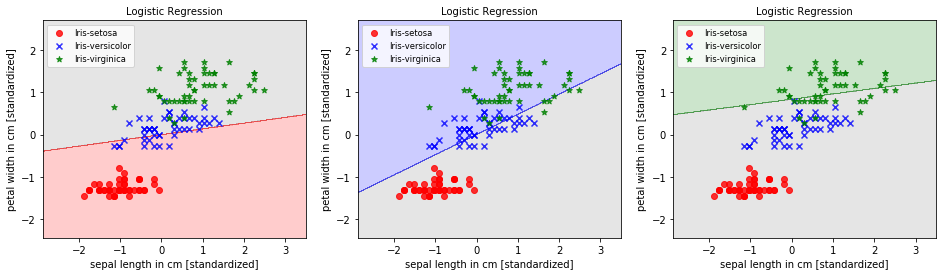

In [24]:
# Plot decision regions for each class
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (16,4))
for i in range(len(ax)):
    plot_decision_regions(NF_Std, NC_Class, classifier = clf.clfs[i], is_sub_plot=True, plot=ax[i], positive_color=pltC[i])
plt.show()

In [25]:
# Two Feature Cases:
# sepal width (1) and petal length (2)
fdx = np.array([1,2])
# Get Class Labels and Selected Features for each sample
NC, NF, NC_Class = get_class_labels_and_features()

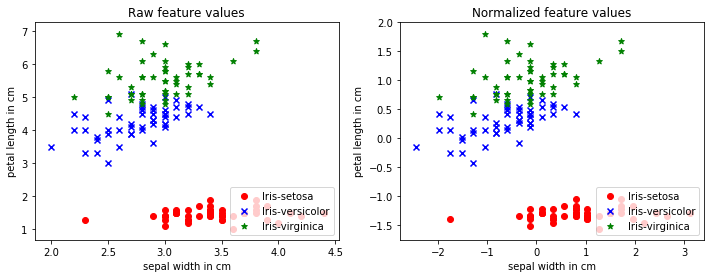

In [26]:
# Standardize Inputs
NF_Std = standardize_features(NF)

plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12,4))
plot_features(ax[0], NF, NC_Class, 'Raw feature values')
plot_features(ax[1], NF_Std, NC_Class, 'Normalized feature values')
plt.show()

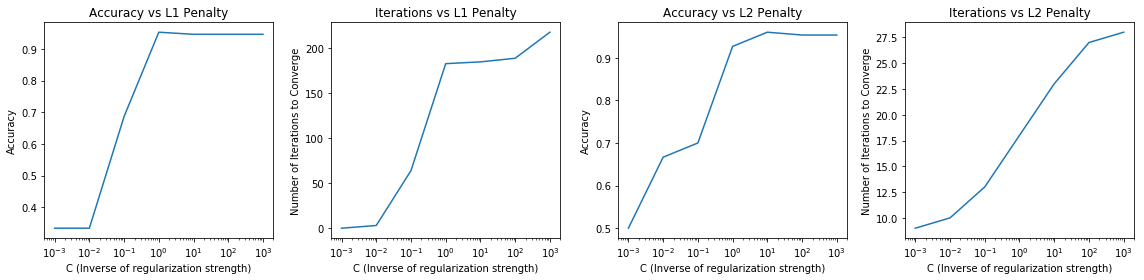

In [27]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (16,4))

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
accuracy_L1 = []
accuracy_L2 = []
num_iter_L1 = []
num_iter_L2 = []

for curr_C in C_values:
    clf_L1 = one_vs_rest_logistic_regression(penalty='l1', C=curr_C).fit(NF, NC)
    accuracy_L1.append(clf_L1.score(NF, NC))
    num_iter_L1.append(clf_L1.n_iter_[0])
    clf_L2 = one_vs_rest_logistic_regression(penalty='l2', C=curr_C).fit(NF, NC)
    accuracy_L2.append(clf_L2.score(NF, NC))
    num_iter_L2.append(clf_L2.n_iter_[0])

ax[0].semilogx(C_values, accuracy_L1)
ax[0].set_xlabel("C (Inverse of regularization strength)")
ax[0].set_ylabel("Accuracy")
ax[0].set_title("Accuracy vs L1 Penalty")

ax[1].semilogx(C_values, num_iter_L1)
ax[1].set_xlabel("C (Inverse of regularization strength)")
ax[1].set_ylabel("Number of Iterations to Converge")
ax[1].set_title("Iterations vs L1 Penalty")

ax[2].semilogx(C_values, accuracy_L2)
ax[2].set_xlabel("C (Inverse of regularization strength)")
ax[2].set_ylabel("Accuracy")
ax[2].set_title("Accuracy vs L2 Penalty")

ax[3].semilogx(C_values, num_iter_L2)
ax[3].set_xlabel("C (Inverse of regularization strength)")
ax[3].set_ylabel("Number of Iterations to Converge")
ax[3].set_title("Iterations vs L2 Penalty")

fig.tight_layout()
plt.show()

In [28]:
# Train on default settings and record
clf = one_vs_rest_logistic_regression().fit(NF, NC)
acc = clf.score(NF, NC)
n_iter = clf.n_iter_[0]
Records.append([case_num, len(fdx), np.copy(fdx), acc, n_iter])
case_num+=1
print(acc)

0.953333333333


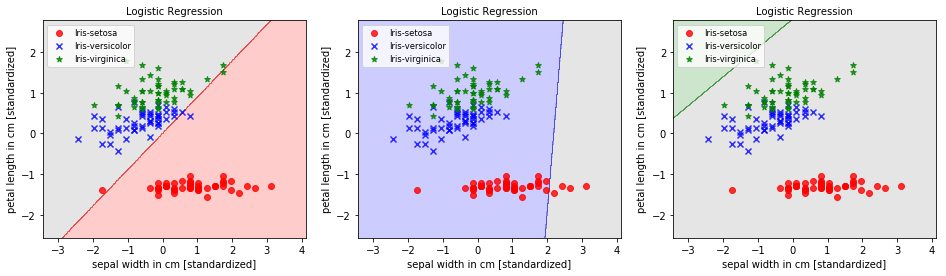

In [29]:
# Plot decision regions for each class
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (16,4))
for i in range(len(ax)):
    plot_decision_regions(NF_Std, NC_Class, classifier = clf.clfs[i], is_sub_plot=True, plot=ax[i], positive_color=pltC[i])
plt.show()

In [30]:
# Two Feature Cases:
# sepal width (1) and petal width (3)
fdx = np.array([1,3])
# Get Class Labels and Selected Features for each sample
NC, NF, NC_Class = get_class_labels_and_features()

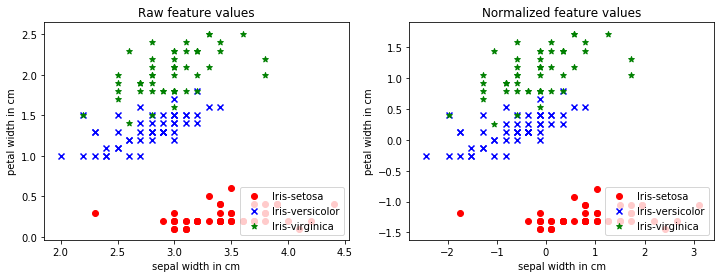

In [31]:
# Standardize Inputs
NF_Std = standardize_features(NF)

plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12,4))
plot_features(ax[0], NF, NC_Class, 'Raw feature values')
plot_features(ax[1], NF_Std, NC_Class, 'Normalized feature values')
plt.show()

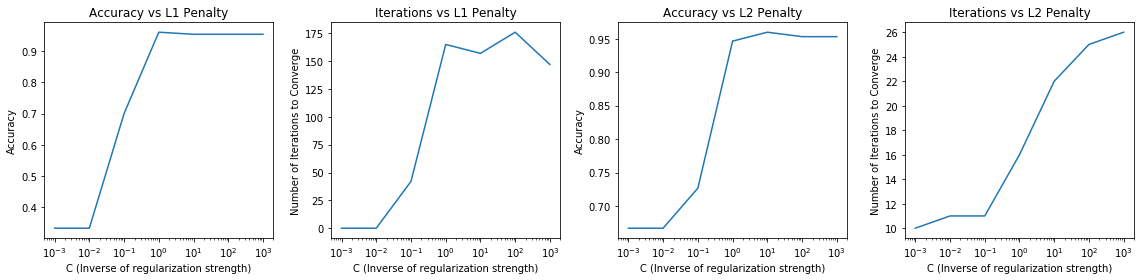

In [32]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (16,4))

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
accuracy_L1 = []
accuracy_L2 = []
num_iter_L1 = []
num_iter_L2 = []

for curr_C in C_values:
    clf_L1 = one_vs_rest_logistic_regression(penalty='l1', C=curr_C).fit(NF, NC)
    accuracy_L1.append(clf_L1.score(NF, NC))
    num_iter_L1.append(clf_L1.n_iter_[0])
    clf_L2 = one_vs_rest_logistic_regression(penalty='l2', C=curr_C).fit(NF, NC)
    accuracy_L2.append(clf_L2.score(NF, NC))
    num_iter_L2.append(clf_L2.n_iter_[0])

ax[0].semilogx(C_values, accuracy_L1)
ax[0].set_xlabel("C (Inverse of regularization strength)")
ax[0].set_ylabel("Accuracy")
ax[0].set_title("Accuracy vs L1 Penalty")

ax[1].semilogx(C_values, num_iter_L1)
ax[1].set_xlabel("C (Inverse of regularization strength)")
ax[1].set_ylabel("Number of Iterations to Converge")
ax[1].set_title("Iterations vs L1 Penalty")

ax[2].semilogx(C_values, accuracy_L2)
ax[2].set_xlabel("C (Inverse of regularization strength)")
ax[2].set_ylabel("Accuracy")
ax[2].set_title("Accuracy vs L2 Penalty")

ax[3].semilogx(C_values, num_iter_L2)
ax[3].set_xlabel("C (Inverse of regularization strength)")
ax[3].set_ylabel("Number of Iterations to Converge")
ax[3].set_title("Iterations vs L2 Penalty")

fig.tight_layout()
plt.show()

In [33]:
# Train on default settings and record
clf = one_vs_rest_logistic_regression().fit(NF, NC)
acc = clf.score(NF, NC)
n_iter = clf.n_iter_[0]
Records.append([case_num, len(fdx), np.copy(fdx), acc, n_iter])
case_num+=1
print(acc)

0.96


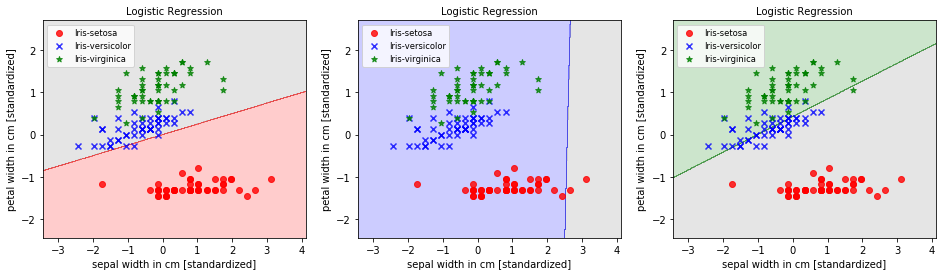

In [34]:
# Plot decision regions for each class
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (16,4))
for i in range(len(ax)):
    plot_decision_regions(NF_Std, NC_Class, classifier = clf.clfs[i], is_sub_plot=True, plot=ax[i], positive_color=pltC[i])
plt.show()

In [35]:
# Two Feature Cases:
# petal length (2) and petal width (3)
fdx = np.array([2,3])
# Get Class Labels and Selected Features for each sample
NC, NF, NC_Class = get_class_labels_and_features()

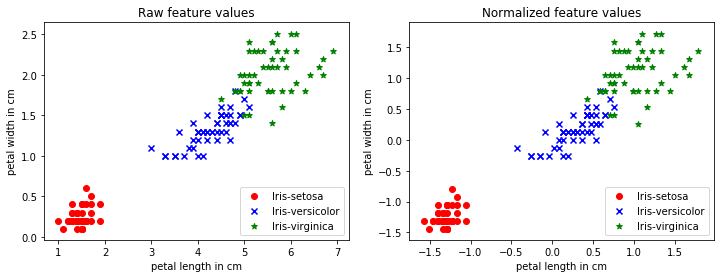

In [36]:
# Standardize Inputs
NF_Std = standardize_features(NF)

plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12,4))
plot_features(ax[0], NF, NC_Class, 'Raw feature values')
plot_features(ax[1], NF_Std, NC_Class, 'Normalized feature values')
plt.show()

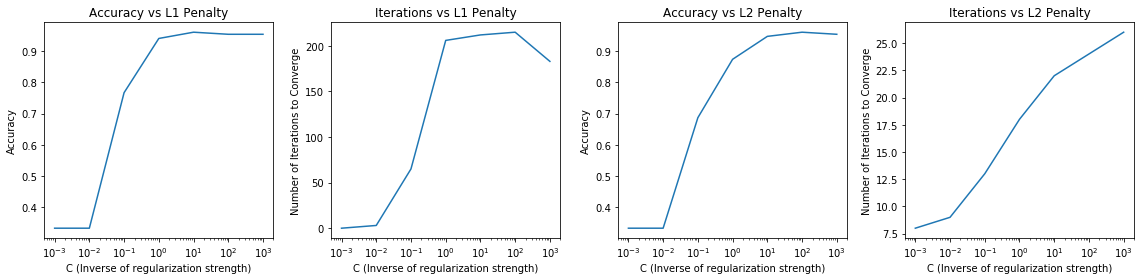

In [37]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (16,4))

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
accuracy_L1 = []
accuracy_L2 = []
num_iter_L1 = []
num_iter_L2 = []

for curr_C in C_values:
    clf_L1 = one_vs_rest_logistic_regression(penalty='l1', C=curr_C).fit(NF, NC)
    accuracy_L1.append(clf_L1.score(NF, NC))
    num_iter_L1.append(clf_L1.n_iter_[0])
    clf_L2 = one_vs_rest_logistic_regression(penalty='l2', C=curr_C).fit(NF, NC)
    accuracy_L2.append(clf_L2.score(NF, NC))
    num_iter_L2.append(clf_L2.n_iter_[0])

ax[0].semilogx(C_values, accuracy_L1)
ax[0].set_xlabel("C (Inverse of regularization strength)")
ax[0].set_ylabel("Accuracy")
ax[0].set_title("Accuracy vs L1 Penalty")

ax[1].semilogx(C_values, num_iter_L1)
ax[1].set_xlabel("C (Inverse of regularization strength)")
ax[1].set_ylabel("Number of Iterations to Converge")
ax[1].set_title("Iterations vs L1 Penalty")

ax[2].semilogx(C_values, accuracy_L2)
ax[2].set_xlabel("C (Inverse of regularization strength)")
ax[2].set_ylabel("Accuracy")
ax[2].set_title("Accuracy vs L2 Penalty")

ax[3].semilogx(C_values, num_iter_L2)
ax[3].set_xlabel("C (Inverse of regularization strength)")
ax[3].set_ylabel("Number of Iterations to Converge")
ax[3].set_title("Iterations vs L2 Penalty")

fig.tight_layout()
plt.show()

In [38]:
# Train on default settings and record
clf = one_vs_rest_logistic_regression().fit(NF, NC)
acc = clf.score(NF, NC)
n_iter = clf.n_iter_[0]
Records.append([case_num, len(fdx), np.copy(fdx), acc, n_iter])
case_num+=1
print(acc)

0.94


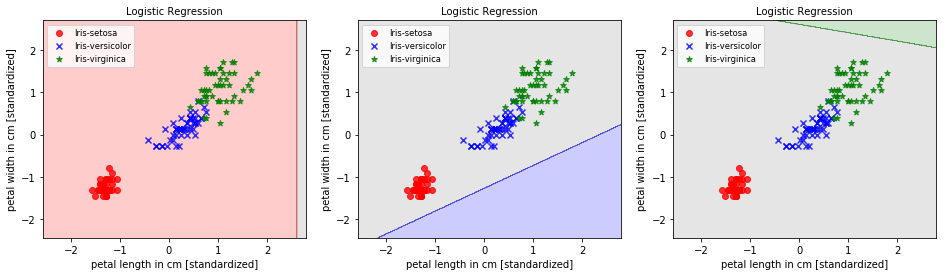

In [39]:
# Plot decision regions for each class
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (16,4))
for i in range(len(ax)):
    plot_decision_regions(NF_Std, NC_Class, classifier = clf.clfs[i], is_sub_plot=True, plot=ax[i], positive_color=pltC[i])
plt.show()

## -------------------------------------------Three Feature Cases-----------------------------------------

In [40]:
# Three Feature Cases:
# sepal length (0), sepal width (1) and petal length (2)
fdx = np.array([0,1,2])
# Get Class Labels and Selected Features for each sample
NC, NF, NC_Class = get_class_labels_and_features()

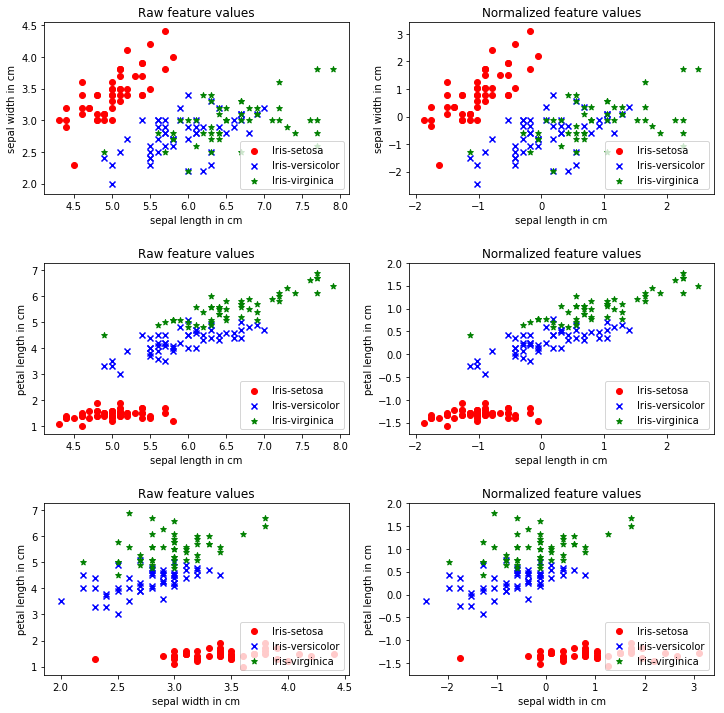

In [41]:
# Standardize Inputs

NF_Std = standardize_features(NF)

plt.close('all')
plot_raw_standardized()

plt.show()

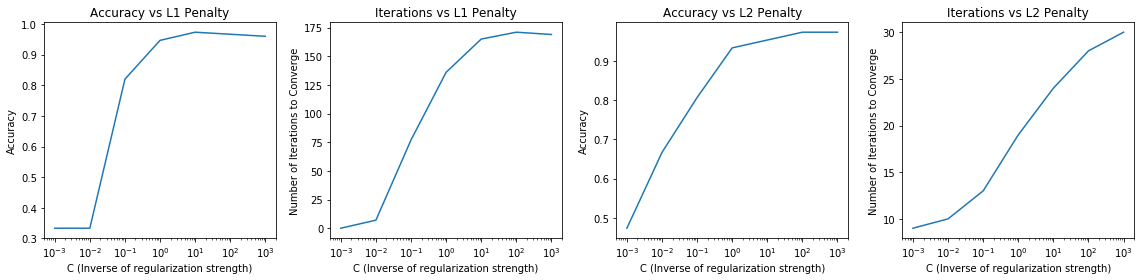

In [42]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (16,4))

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
accuracy_L1 = []
accuracy_L2 = []
num_iter_L1 = []
num_iter_L2 = []

for curr_C in C_values:
    clf_L1 = one_vs_rest_logistic_regression(penalty='l1', C=curr_C).fit(NF, NC)
    accuracy_L1.append(clf_L1.score(NF, NC))
    num_iter_L1.append(clf_L1.n_iter_[0])
    clf_L2 = one_vs_rest_logistic_regression(penalty='l2', C=curr_C).fit(NF, NC)
    accuracy_L2.append(clf_L2.score(NF, NC))
    num_iter_L2.append(clf_L2.n_iter_[0])

ax[0].semilogx(C_values, accuracy_L1)
ax[0].set_xlabel("C (Inverse of regularization strength)")
ax[0].set_ylabel("Accuracy")
ax[0].set_title("Accuracy vs L1 Penalty")

ax[1].semilogx(C_values, num_iter_L1)
ax[1].set_xlabel("C (Inverse of regularization strength)")
ax[1].set_ylabel("Number of Iterations to Converge")
ax[1].set_title("Iterations vs L1 Penalty")

ax[2].semilogx(C_values, accuracy_L2)
ax[2].set_xlabel("C (Inverse of regularization strength)")
ax[2].set_ylabel("Accuracy")
ax[2].set_title("Accuracy vs L2 Penalty")

ax[3].semilogx(C_values, num_iter_L2)
ax[3].set_xlabel("C (Inverse of regularization strength)")
ax[3].set_ylabel("Number of Iterations to Converge")
ax[3].set_title("Iterations vs L2 Penalty")

fig.tight_layout()
plt.show()

In [43]:
# Train on default settings and record
clf = one_vs_rest_logistic_regression().fit(NF, NC)
acc = clf.score(NF, NC)
n_iter = clf.n_iter_[0]
Records.append([case_num, len(fdx), np.copy(fdx), acc, n_iter])
case_num+=1
print(acc)

0.946666666667


In [44]:
# Three Feature Cases:
# sepal length (0), sepal width (1) and petal width (3)
fdx = np.array([0,1,3])
# Get Class Labels and Selected Features for each sample
NC, NF, NC_Class = get_class_labels_and_features()

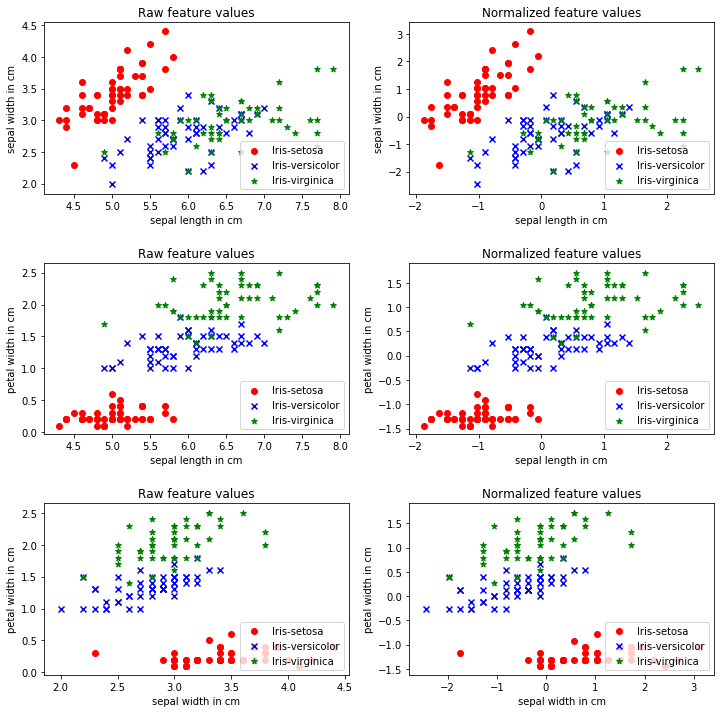

In [45]:
# Standardize Inputs

NF_Std = standardize_features(NF)

plt.close('all')
plot_raw_standardized()

plt.show()

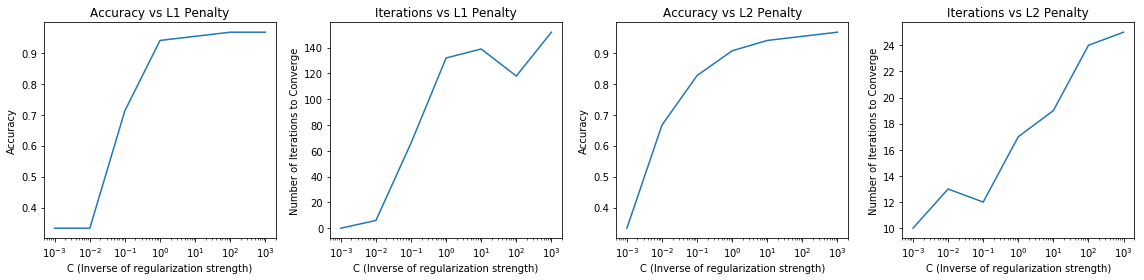

In [46]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (16,4))

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
accuracy_L1 = []
accuracy_L2 = []
num_iter_L1 = []
num_iter_L2 = []

for curr_C in C_values:
    clf_L1 = one_vs_rest_logistic_regression(penalty='l1', C=curr_C).fit(NF, NC)
    accuracy_L1.append(clf_L1.score(NF, NC))
    num_iter_L1.append(clf_L1.n_iter_[0])
    clf_L2 = one_vs_rest_logistic_regression(penalty='l2', C=curr_C).fit(NF, NC)
    accuracy_L2.append(clf_L2.score(NF, NC))
    num_iter_L2.append(clf_L2.n_iter_[0])

ax[0].semilogx(C_values, accuracy_L1)
ax[0].set_xlabel("C (Inverse of regularization strength)")
ax[0].set_ylabel("Accuracy")
ax[0].set_title("Accuracy vs L1 Penalty")

ax[1].semilogx(C_values, num_iter_L1)
ax[1].set_xlabel("C (Inverse of regularization strength)")
ax[1].set_ylabel("Number of Iterations to Converge")
ax[1].set_title("Iterations vs L1 Penalty")

ax[2].semilogx(C_values, accuracy_L2)
ax[2].set_xlabel("C (Inverse of regularization strength)")
ax[2].set_ylabel("Accuracy")
ax[2].set_title("Accuracy vs L2 Penalty")

ax[3].semilogx(C_values, num_iter_L2)
ax[3].set_xlabel("C (Inverse of regularization strength)")
ax[3].set_ylabel("Number of Iterations to Converge")
ax[3].set_title("Iterations vs L2 Penalty")

fig.tight_layout()
plt.show()

In [47]:
# Train on default settings and record
clf = one_vs_rest_logistic_regression().fit(NF, NC)
acc = clf.score(NF, NC)
n_iter = clf.n_iter_[0]
Records.append([case_num, len(fdx), np.copy(fdx), acc, n_iter])
case_num+=1
print(acc)

0.94


In [48]:
# Three Feature Cases:
# sepal length (0), petal length (2) and petal width (3)
fdx = np.array([0,2,3])
# Get Class Labels and Selected Features for each sample
NC, NF, NC_Class = get_class_labels_and_features()

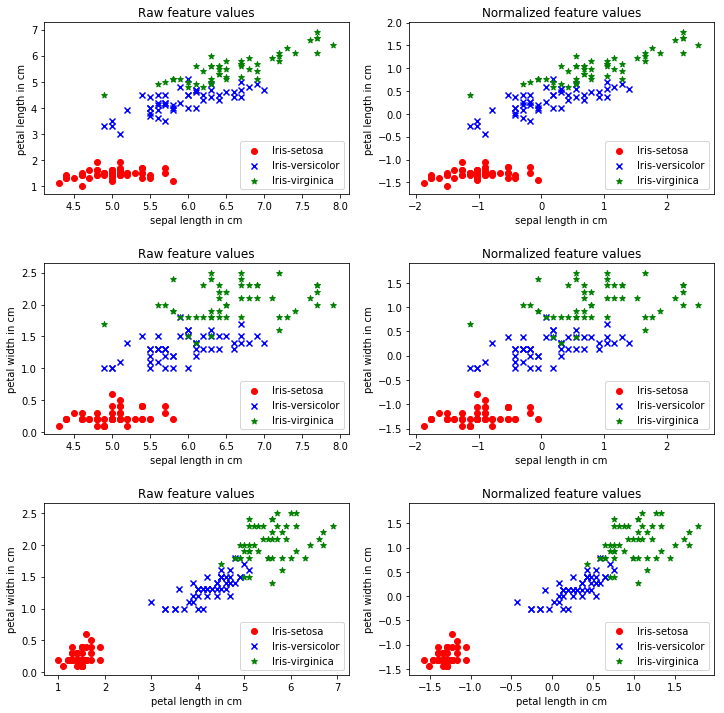

In [49]:
# Standardize Inputs

NF_Std = standardize_features(NF)

plt.close('all')
plot_raw_standardized()

plt.show()

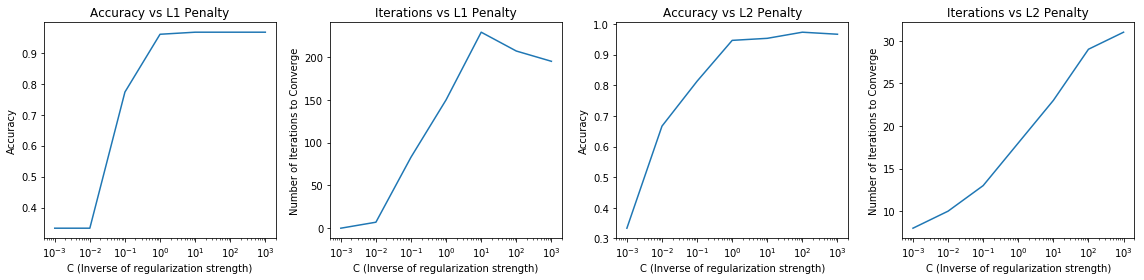

In [50]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (16,4))

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
accuracy_L1 = []
accuracy_L2 = []
num_iter_L1 = []
num_iter_L2 = []

for curr_C in C_values:
    clf_L1 = one_vs_rest_logistic_regression(penalty='l1', C=curr_C).fit(NF, NC)
    accuracy_L1.append(clf_L1.score(NF, NC))
    num_iter_L1.append(clf_L1.n_iter_[0])
    clf_L2 = one_vs_rest_logistic_regression(penalty='l2', C=curr_C).fit(NF, NC)
    accuracy_L2.append(clf_L2.score(NF, NC))
    num_iter_L2.append(clf_L2.n_iter_[0])

ax[0].semilogx(C_values, accuracy_L1)
ax[0].set_xlabel("C (Inverse of regularization strength)")
ax[0].set_ylabel("Accuracy")
ax[0].set_title("Accuracy vs L1 Penalty")

ax[1].semilogx(C_values, num_iter_L1)
ax[1].set_xlabel("C (Inverse of regularization strength)")
ax[1].set_ylabel("Number of Iterations to Converge")
ax[1].set_title("Iterations vs L1 Penalty")

ax[2].semilogx(C_values, accuracy_L2)
ax[2].set_xlabel("C (Inverse of regularization strength)")
ax[2].set_ylabel("Accuracy")
ax[2].set_title("Accuracy vs L2 Penalty")

ax[3].semilogx(C_values, num_iter_L2)
ax[3].set_xlabel("C (Inverse of regularization strength)")
ax[3].set_ylabel("Number of Iterations to Converge")
ax[3].set_title("Iterations vs L2 Penalty")

fig.tight_layout()
plt.show()

In [51]:
# Train on default settings and record
clf = one_vs_rest_logistic_regression().fit(NF, NC)
acc = clf.score(NF, NC)
n_iter = clf.n_iter_[0]
Records.append([case_num, len(fdx), np.copy(fdx), acc, n_iter])
case_num+=1
print(acc)

0.96


In [52]:
# Three Feature Cases:
# sepal width (1), petal length (2) and petal width (3)
fdx = np.array([1,2,3])
# Get Class Labels and Selected Features for each sample
NC, NF, NC_Class = get_class_labels_and_features()

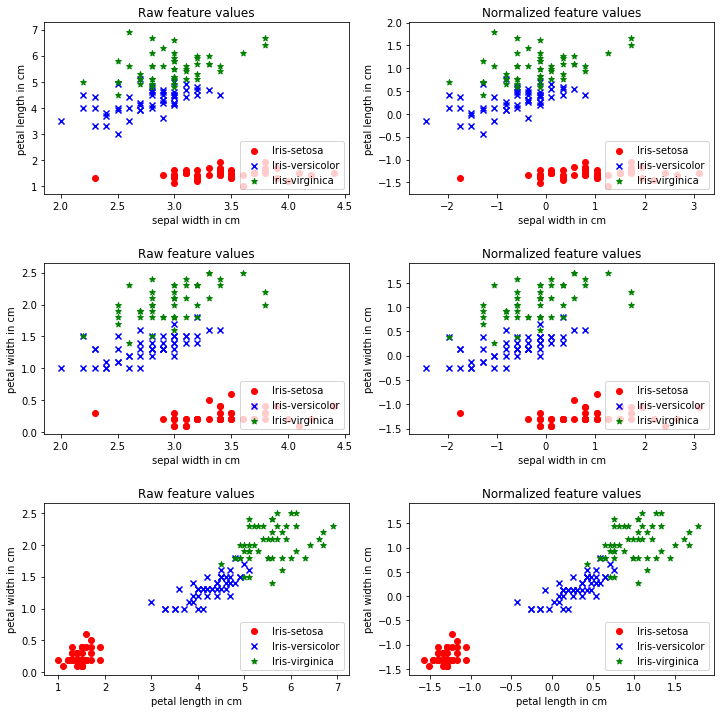

In [53]:
# Standardize Inputs

NF_Std = standardize_features(NF)

plt.close('all')
plot_raw_standardized()

plt.show()

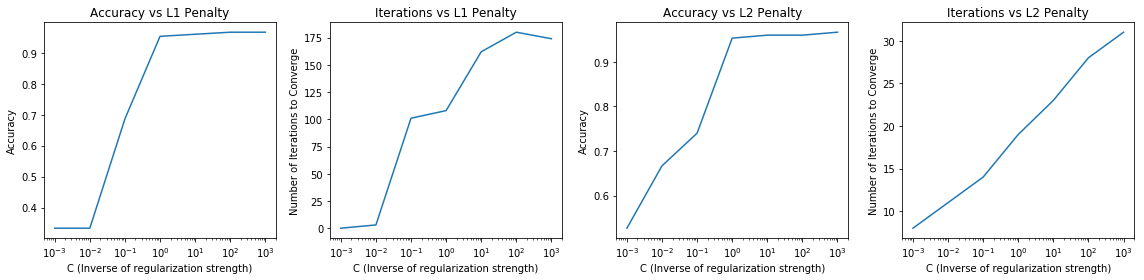

In [54]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (16,4))

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
accuracy_L1 = []
accuracy_L2 = []
num_iter_L1 = []
num_iter_L2 = []

for curr_C in C_values:
    clf_L1 = one_vs_rest_logistic_regression(penalty='l1', C=curr_C).fit(NF, NC)
    accuracy_L1.append(clf_L1.score(NF, NC))
    num_iter_L1.append(clf_L1.n_iter_[0])
    clf_L2 = one_vs_rest_logistic_regression(penalty='l2', C=curr_C).fit(NF, NC)
    accuracy_L2.append(clf_L2.score(NF, NC))
    num_iter_L2.append(clf_L2.n_iter_[0])

ax[0].semilogx(C_values, accuracy_L1)
ax[0].set_xlabel("C (Inverse of regularization strength)")
ax[0].set_ylabel("Accuracy")
ax[0].set_title("Accuracy vs L1 Penalty")

ax[1].semilogx(C_values, num_iter_L1)
ax[1].set_xlabel("C (Inverse of regularization strength)")
ax[1].set_ylabel("Number of Iterations to Converge")
ax[1].set_title("Iterations vs L1 Penalty")

ax[2].semilogx(C_values, accuracy_L2)
ax[2].set_xlabel("C (Inverse of regularization strength)")
ax[2].set_ylabel("Accuracy")
ax[2].set_title("Accuracy vs L2 Penalty")

ax[3].semilogx(C_values, num_iter_L2)
ax[3].set_xlabel("C (Inverse of regularization strength)")
ax[3].set_ylabel("Number of Iterations to Converge")
ax[3].set_title("Iterations vs L2 Penalty")

fig.tight_layout()
plt.show()

In [55]:
# Train on default settings and record
clf = one_vs_rest_logistic_regression().fit(NF, NC)
acc = clf.score(NF, NC)
n_iter = clf.n_iter_[0]
Records.append([case_num, len(fdx), np.copy(fdx), acc, n_iter])
case_num+=1
print(acc)

0.953333333333


## -------------------------------------------Four Feature Case-------------------------------------------

In [56]:
# Four Feature Cases:
# sepal length (0), sepal width (1), petal length (2) and petal width (3)
fdx = np.array([0,1,2,3])
# Get Class Labels and Selected Features for each sample
NC, NF, NC_Class = get_class_labels_and_features()

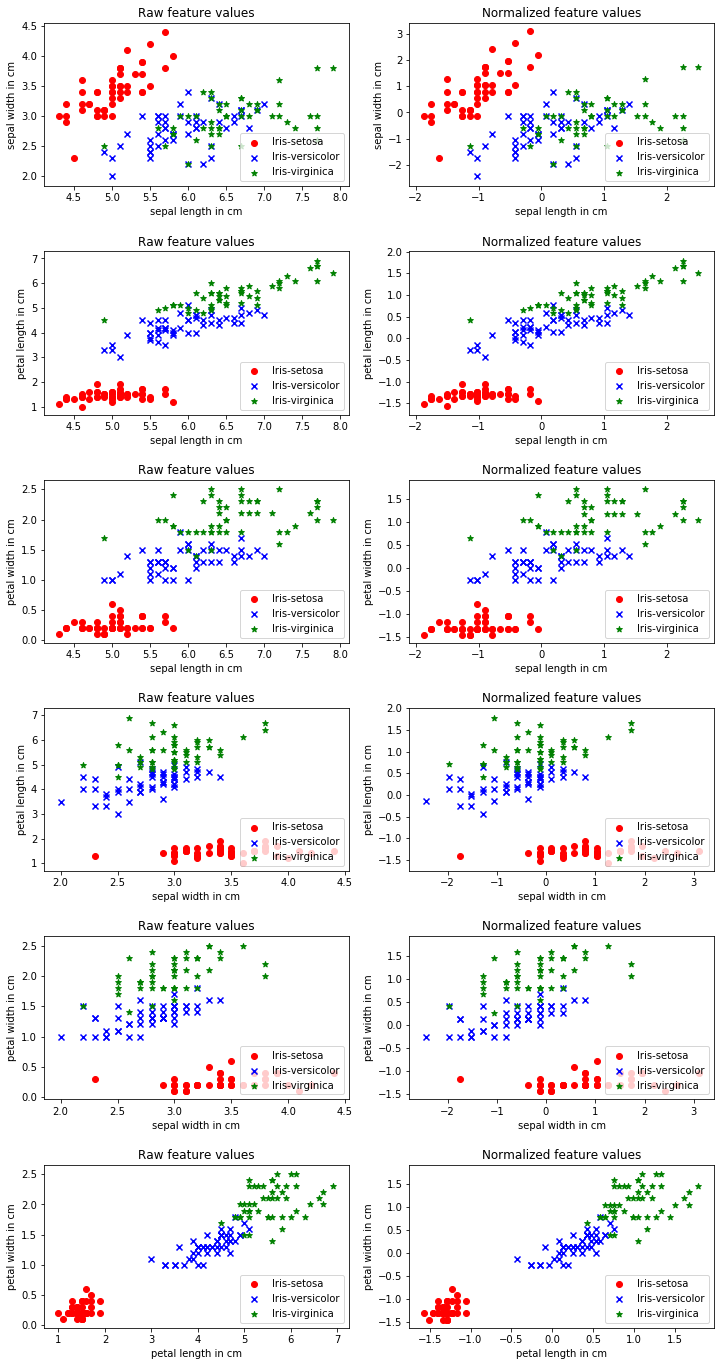

In [57]:
# Standardize Inputs

NF_Std = standardize_features(NF)

plt.close('all')
plot_raw_standardized()

plt.show()

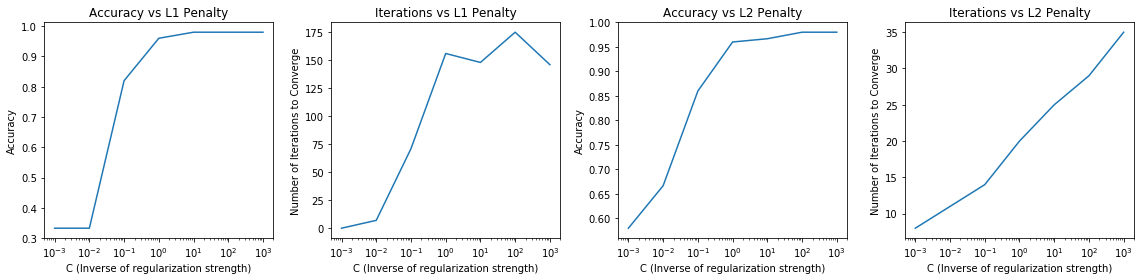

In [58]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (16,4))

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
accuracy_L1 = []
accuracy_L2 = []
num_iter_L1 = []
num_iter_L2 = []

for curr_C in C_values:
    clf_L1 = one_vs_rest_logistic_regression(penalty='l1', C=curr_C).fit(NF, NC)
    accuracy_L1.append(clf_L1.score(NF, NC))
    num_iter_L1.append(clf_L1.n_iter_[0])
    clf_L2 = one_vs_rest_logistic_regression(penalty='l2', C=curr_C).fit(NF, NC)
    accuracy_L2.append(clf_L2.score(NF, NC))
    num_iter_L2.append(clf_L2.n_iter_[0])

ax[0].semilogx(C_values, accuracy_L1)
ax[0].set_xlabel("C (Inverse of regularization strength)")
ax[0].set_ylabel("Accuracy")
ax[0].set_title("Accuracy vs L1 Penalty")

ax[1].semilogx(C_values, num_iter_L1)
ax[1].set_xlabel("C (Inverse of regularization strength)")
ax[1].set_ylabel("Number of Iterations to Converge")
ax[1].set_title("Iterations vs L1 Penalty")

ax[2].semilogx(C_values, accuracy_L2)
ax[2].set_xlabel("C (Inverse of regularization strength)")
ax[2].set_ylabel("Accuracy")
ax[2].set_title("Accuracy vs L2 Penalty")

ax[3].semilogx(C_values, num_iter_L2)
ax[3].set_xlabel("C (Inverse of regularization strength)")
ax[3].set_ylabel("Number of Iterations to Converge")
ax[3].set_title("Iterations vs L2 Penalty")

fig.tight_layout()
plt.show()

In [59]:
# Train on default settings and record
clf = one_vs_rest_logistic_regression().fit(NF, NC)
acc = clf.score(NF, NC)
n_iter = clf.n_iter_[0]
Records.append([case_num, len(fdx), np.copy(fdx), acc, n_iter])
case_num+=1
print(acc)

0.96


## --------------------------------------------Summary-----------------------------------------------------

In [60]:
from prettytable import PrettyTable
t = PrettyTable(['Case Num', 'Num Features', 'Features Used', 'Accuracy', 'Num Iterations'])
for record in Records:
    t.add_row(record)
print(t)

+----------+--------------+---------------+----------------+----------------+
| Case Num | Num Features | Features Used |    Accuracy    | Num Iterations |
+----------+--------------+---------------+----------------+----------------+
|    0     |      2       |     [0 1]     | 0.793333333333 |      253       |
|    1     |      2       |     [0 2]     | 0.933333333333 |      155       |
|    2     |      2       |     [0 3]     | 0.926666666667 |      136       |
|    3     |      2       |     [1 2]     | 0.953333333333 |      201       |
|    4     |      2       |     [1 3]     |      0.96      |      148       |
|    5     |      2       |     [2 3]     |      0.94      |      202       |
|    6     |      3       |    [0 1 2]    | 0.946666666667 |      160       |
|    7     |      3       |    [0 1 3]    |      0.94      |      138       |
|    8     |      3       |    [0 2 3]    |      0.96      |      167       |
|    9     |      3       |    [1 2 3]    | 0.953333333333 |    

In [61]:
def calculate_avg_max(num_features):
    sum_acc = 0
    max_acc = 0
    count = 0
    for i in range(len(Records)):
        if Records[i][1] == num_features:
            count += 1
            sum_acc += Records[i][3]
            if Records[i][3] > max_acc:
                max_acc = Records[i][3]
    return (sum_acc/count, max_acc)

In [62]:
two_avg, two_max = calculate_avg_max(2)
three_avg, three_max = calculate_avg_max(3)
four_avg, four_max = calculate_avg_max(4)
print("Accuracy:")
print("Two features: \n\tAverage: {}\n\tMax: {}".format(two_avg, two_max))
print("Three features: \n\tAverage: {}\n\tMax: {}".format(three_avg, three_max))
print("Four features: \n\tAverage: {}\n\tMax: {}".format(four_avg, four_max))

Accuracy:
Two features: 
	Average: 0.9177777777777777
	Max: 0.96
Three features: 
	Average: 0.95
	Max: 0.96
Four features: 
	Average: 0.96
	Max: 0.96


In [63]:
# Discussion:
#     Similar to the results for the Adaline trials, the One-vs-Rest Logistic Regression approach utilized here showed
# comparable results regardless of number of features. The highest accuracy, 0.96, was acheived by one case in each of
# the three feature count groups. Again, the results show that the higher importance seems to be on which features are
# used in each particular case. The combination of the sepal length and width, which resulted in an accuracy of 0.75 
# when using Adaline, performed slightly better with an accuracy of 0.793 but still remained the poorest performing
# case. Additionally, here it also took the highest number of iterations to allow its classifiers to converge leading 
# to the conclusion that these features are simply not optimal for classifying the Iris species.
#     A new topic in this homework was that of regularization. Both L1 and L2 regularization were explored with C,
# the inverse regularization strength ranging from 0.001 to 1000, increasing by a factor of 10. For L1, the graphs show
# a large gain in accuracy from C = 0.01 to C = 1. The effect before and after this interval was very minor. With L2,
# on the other hand, there was a gradual increase from C = 0.001 up to as high as C = 10 in some cases. This seems to 
# show that the ideal value of C for both penalties was around 1 to 10 since, while increasing C may result in better 
# accuracy, the number of iterations increases as well. The regularizations seem to trade performance for greater
# accuracy and could be very useful depending on the priorities of the system.